<a href="https://colab.research.google.com/github/MalcaRodas/Practicas_calificadas_quimica/blob/main/PC_Cinetica_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>Cinética y Termodinámica</b> </font>
<a name="loading"></a>

<font size='4' style="color:#00A6D6">  <b>Malca Rodas Kevin Saul

</b> </font>
<a name="loading"></a>

## [1] Instalación de librerías

In [ ]:
  %%capture
  !pip install rdkit
  !pip install pyscf

In [ ]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

## [2] Estructuras

### Isómero CIS

In [ ]:
# representación SMILES
ac_form = "C/C=C/C"
# elemento de RDKit
ac = Chem.MolFromSmiles(ac_form)
# agregamos sus hidrógenos
ac = Chem.AddHs(ac)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(ac, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(ac, "ac.xyz")

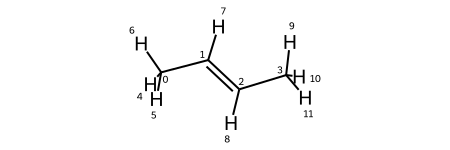

In [ ]:
#visualizamos
ac

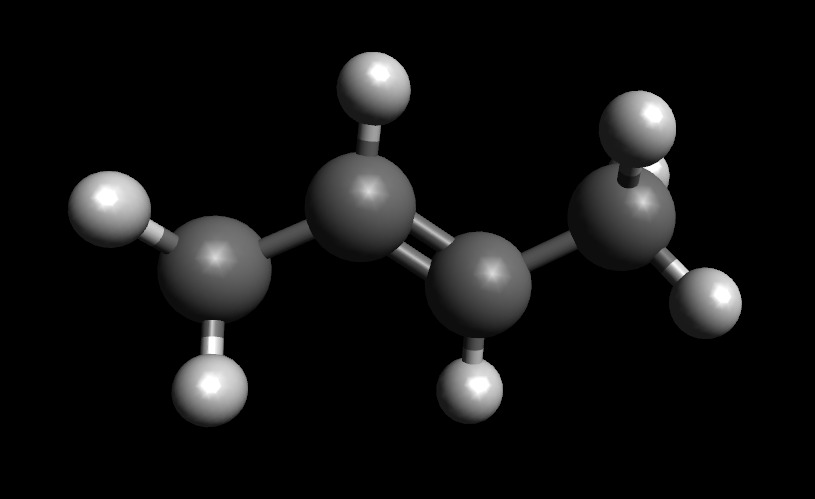

In [ ]:
# visualizamos las coordenadas en el archivo XYZ
!cat ac.xyz

12

C     -1.454705   -0.292919   -0.013898
C     -0.609272    0.895974    0.013293
C      0.707521    0.759139    0.014986
C      1.415436   -0.521933   -0.008790
H     -2.019854   -0.410770    0.958449
H     -0.953309   -1.236861   -0.195028
H     -2.263645   -0.203756   -0.795167
H     -1.069498    1.869316    0.031627
H      1.281672    1.693770    0.036127
H      1.477006   -0.937039    1.022138
H      2.476790   -0.358196   -0.325258
H      1.011859   -1.256726   -0.738478


### Isómero TRANS

In [ ]:
smi_trans = "C/C=C\C"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

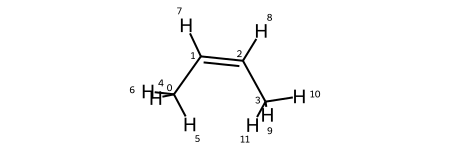

In [ ]:
trans

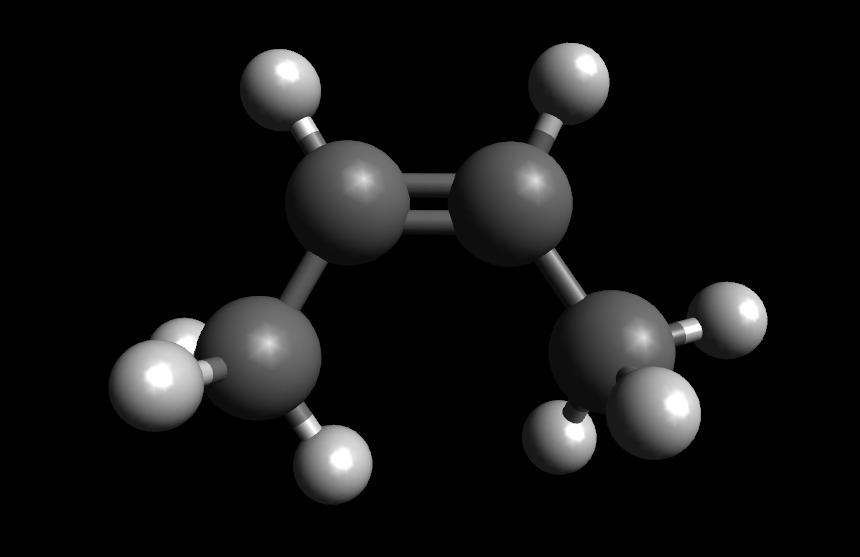

In [ ]:
!cat trans.xyz

12

C     -1.454705   -0.292919   -0.013898
C     -0.609272    0.895974    0.013293
C      0.707521    0.759139    0.014986
C      1.415436   -0.521933   -0.008790
H     -2.019854   -0.410770    0.958449
H     -0.953309   -1.236861   -0.195028
H     -2.263645   -0.203756   -0.795167
H     -1.069498    1.869316    0.031627
H      1.281672    1.693770    0.036127
H      1.477006   -0.937039    1.022138
H      2.476790   -0.358196   -0.325258
H      1.011859   -1.256726   -0.738478


### Diedro = 90.0 º

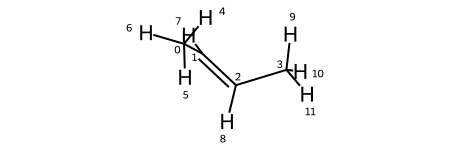

In [ ]:
Chem.AllChem.SetDihedralDeg(ac.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(ac, "diedro90.xyz")
ac

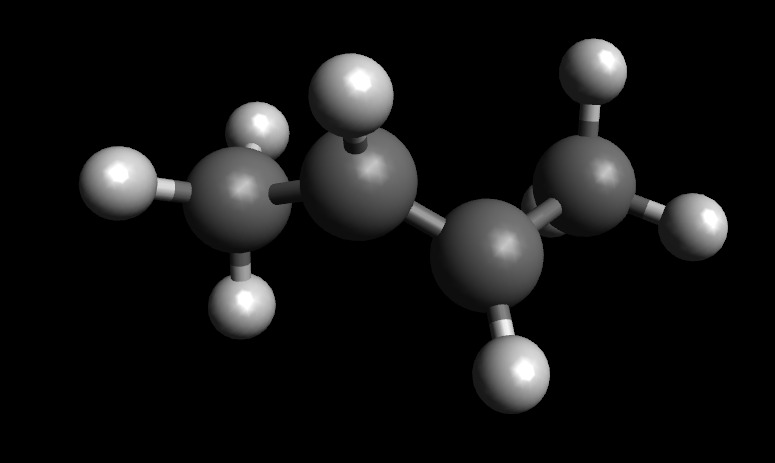

In [ ]:
!cat diedro90.xyz

12

C     -1.005783    0.709031   -1.487268
C     -0.483747    0.430759   -0.119909
C      0.472193   -0.465591    0.089735
C      1.908739   -0.029299    0.048534
H     -0.388895    1.461747   -1.994253
H     -0.976485   -0.241807   -2.084937
H     -2.086588    1.027623   -1.419621
H     -0.872133    0.957241    0.757571
H      0.219678   -1.501990    0.288729
H      2.024910    0.986283    0.513156
H      2.309293   -0.076310   -0.966529
H      2.498803   -0.722684    0.706911


## [3] Cálculo de energía

### CIS

In [ ]:
ac = gto.M(atom="ac.xyz")

In [ ]:
ac.basis = "6-31G"
mf_ac = ac.KS()
mf_ac.xc = 'b3lyp'

In [ ]:
resultado_ac = mf_ac.kernel()
resultado_ac

converged SCF energy = -155.319339142005


-155.31933914200505

### Diedro 90

In [ ]:
ac_90 = gto.M(atom="diedro90.xyz")

In [ ]:
ac_90.basis = "6-31G"
mf_90 = ac_90.KS()
mf_90.xc = 'b3lyp'

In [ ]:
resultado_ac_90 = mf_90.kernel()
resultado_ac_90

converged SCF energy = -155.139246534067


-155.1392465340665

### TRANS

In [ ]:
trans = gto.M(atom="trans.xyz")

In [ ]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [ ]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -155.3137044659


-155.31370446590023

## 4. Gráfica

In [ ]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [ ]:
import matplotlib.pyplot as plt
from energydiagram import ED

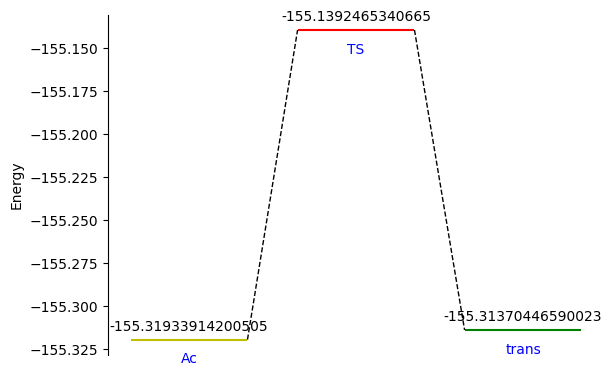

In [ ]:
diagram = ED()
diagram.add_level(resultado_ac,'Ac',color='y')
diagram.add_level(resultado_ac_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / $kcal$ $mol^{-1}$")

## Cinética:

In [ ]:
E_activacion = resultado_ac_90 - resultado_ac
E_activacion

0.18009260793854764

## Termodinámica

In [ ]:
entalpia = resultado_trans - resultado_ac
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
